卷积神经网络之激活函数
===

# 1.激活函数的意义
激活函数的目的，是为了在神经网络中引入非线性的因素，使得我们可以任意学习输入和输出之间的复杂变换

# 2.Sigmoid
- 正向看，函数$y(x)=\frac{1}{1+e^{-x}}$，优点是输出数据可以映射到$[0,1]$之间,很好 
- 反向看，$y'(x)=y(x)(1-y(x))$。缺点是梯度下降明显，至少减少75%。这是因为$y'$最大值是0.25，如果梯度原来是1，那么1 * 0.25 = 0.25，那么就是梯度损失了1-25%=75%。所以在深度学习中，最后一层可以使用Sigmoid函数。中间层不可使用，因为梯度损失太厉害

Text(0.5, 1.0, 'Sigmoid函数的导数函数图像')

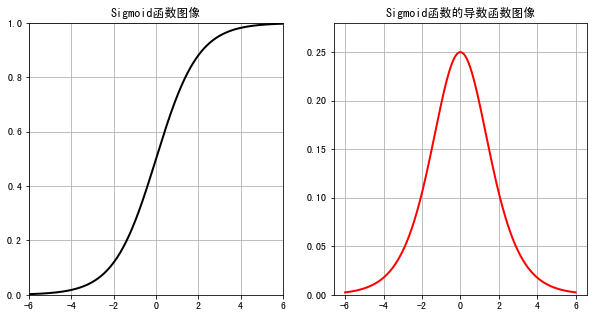

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.exp(-x))

y1 = y * (1-y)
plt.figure(facecolor='w', figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-6, 6))
plt.ylim((0, 1))
plt.title(u'Sigmoid函数图像')

plt.subplot(1,2,2)
plt.plot(x, y1, linewidth=2, color="red")
plt.grid(True)
plt.ylim((0, 0.28))
plt.title(u'Sigmoid函数的导数函数图像')

# 3.tanh
- 正向看，函数$f(x)=tanh(x)=\frac{1-e^{-2x}}{1+e^{-2x}}$，优点是输出数据可以映射到$[-1,1]$
- 反向看，$f'(x)=1-f(x)^2$。最大值为1,也就是说只有f(x)=0的时候，反向梯度才是1，但是正向为0，也就没有什么激励过程了

Text(0.5, 1.0, 'Tanh导数函数图像')

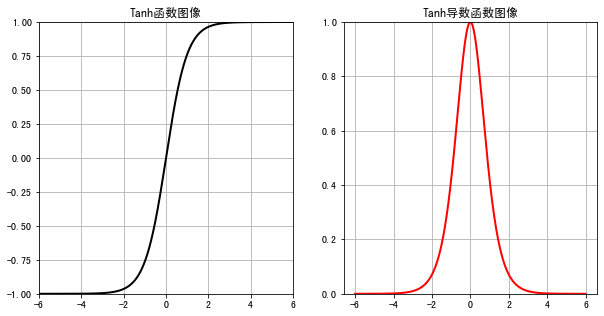

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

x = np.linspace(-6, 6, 1000)
y = (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))

y1 = 1 - y**2
plt.figure(facecolor='w', figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-6, 6))
plt.ylim((-1, 1))
plt.title(u'Tanh函数图像')

plt.subplot(1,2,2)
plt.plot(x, y1, linewidth=2, color="red")
plt.grid(True)
plt.ylim((0, 1))
plt.title(u'Tanh导数函数图像')

# 4.ReLU(Rectified linear unit)
$$
f(x)=\begin{cases}
0 & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0 & x \le 0\\\\
1 & x \geq 0
\end{cases}
$$
这个函数正向截断负值，损失大量特征，反向梯度没有损失。由于特征特别多，所以损失一些特征没有关系

Text(0.5, 1.0, 'ReLU导数函数图像')

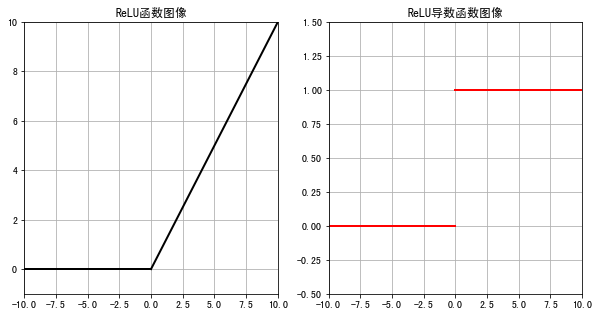

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

x = np.linspace(-10, 0, 1000)
y = [0] * 1000

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'ReLU函数图像')

y2 = [0] * 1000
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'ReLU导数函数图像')

# 5.Leaky ReLU
$$
f(x)=\begin{cases}
0.1x & x \le 0\\\\
x & x \geq 0
\end{cases} f'(x)=\begin{cases}
0.1 & x \le 0\\\\
1 & x \geq 0
\end{cases}
$$
优点是保留更多参数，少量梯度反向传播，这个函数可以解决ReLU函数负值神经元失活的问题。你甚至可以创造自己的激励函数来处理自己的问题, 不过要确保的是这些激励函数必须是可以微分的, 因为在误差反向传递的时候, 只有这些可微分的激励函数才能把误差传递回去。传统神经网络，一般使用Sigmoid或者tanh来做激活函数，而卷积神经网络一般使用ReLU和Leaky ReLU来说激活函数

Text(0.5, 1.0, 'Leaky ReLU导数函数图像')

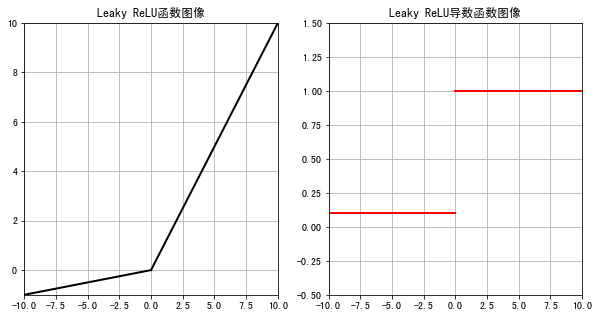

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

x = np.linspace(-10, 0, 1000)
y = 0.1 * x

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'Leaky ReLU函数图像')

y2 = [0.1] * 1000
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'Leaky ReLU导数函数图像')

# 6.ELU
$$
f(x)=\begin{cases}
\alpha(e^x-1) & x \leq 0 \\
x & x > 0
\end{cases}
$$
导数为
$$
f'(x)=\begin{cases}
f(x) + \alpha \\
1 & x > 0
\end{cases}
$$

Text(0.5, 1.0, 'ELU导数函数图像')

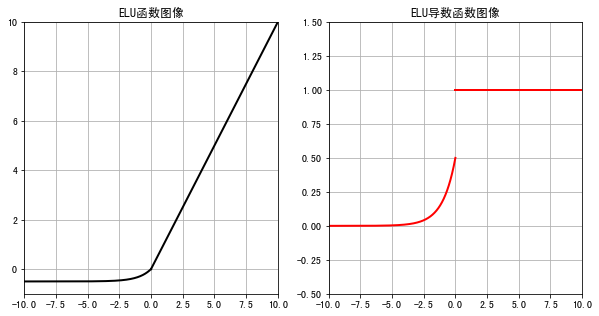

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(facecolor='w', figsize=(10,5))

alpha = 0.5

x = np.linspace(-10, 0, 1000)
y = alpha * (np.exp(x) - 1)

x1 = np.linspace(0, 10, 1000)
y1 = x1
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=2, color="black")
plt.plot(x1, y1, linewidth=2, color="black")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-1, 10))
plt.title(u'ELU函数图像')

y2 = y + alpha
y3 = [1] * 1000
plt.subplot(1,2,2)
plt.plot(x, y2, linewidth=2, color="red")
plt.plot(x1, y3, linewidth=2, color="red")
plt.grid(True)
plt.xlim((-10, 10))
plt.ylim((-0.5, 1.5))
plt.title(u'ELU导数函数图像')